## Parameter search visualizations

This notebook contains simple visualizations of data collected with glitching
script to determine good parameters for Chipwhisperer glitches. 

As of now, only clock glitching is considered as it is proves most effective.

In [2]:
import pandas as pd
import seaborn as sns

In [28]:
df = pd.read_csv("data/param-search/003/results-[10,-10,10].csv", header=0)
sns.set(style="ticks")
df = df.sort_values(by=["good/bad/crash"], ascending=False)

df

,scope.glitch.width,scope.glitch.offset,scope.glitch.repeat,scope.glitch.ext_offset,good/bad/crash
0,-7.81250,48.046875,1,1546498,good
159573,10.15625,46.093750,14,177010,good
159562,-14.84375,-14.843750,16,442214,good
159563,-14.84375,-14.843750,17,442214,good
159564,10.15625,46.093750,1,177010,good
...,...,...,...,...,...
100178,3.90625,8.984375,16,605971,bad
100176,3.90625,8.984375,14,605971,bad
100175,3.90625,8.984375,13,605971,bad
100174,3.90625,8.984375,12,605971,bad


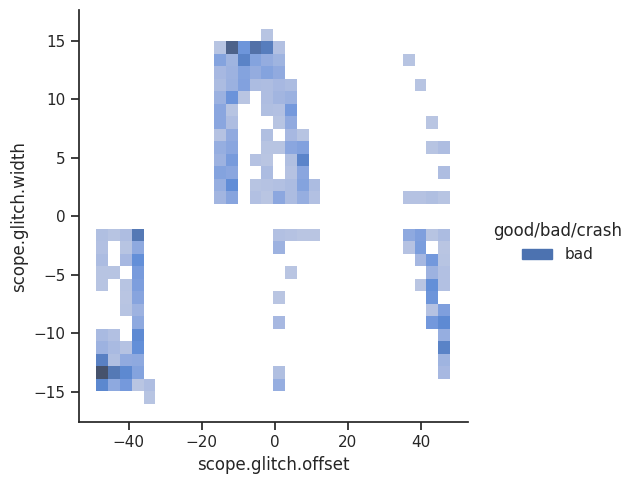

In [33]:
sns.displot(data=df[df["good/bad/crash"] == "bad"], x="scope.glitch.offset", y="scope.glitch.width", hue='good/bad/crash', bins=30)

<Axes: xlabel='scope.glitch.offset', ylabel='scope.glitch.width'>

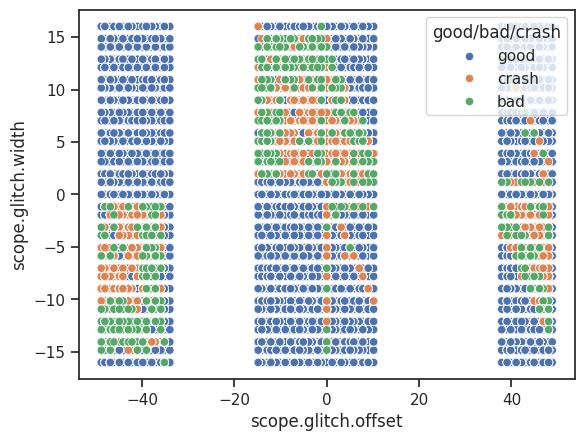

In [29]:
sns.scatterplot(data=df, x="scope.glitch.offset", y="scope.glitch.width", hue='good/bad/crash')

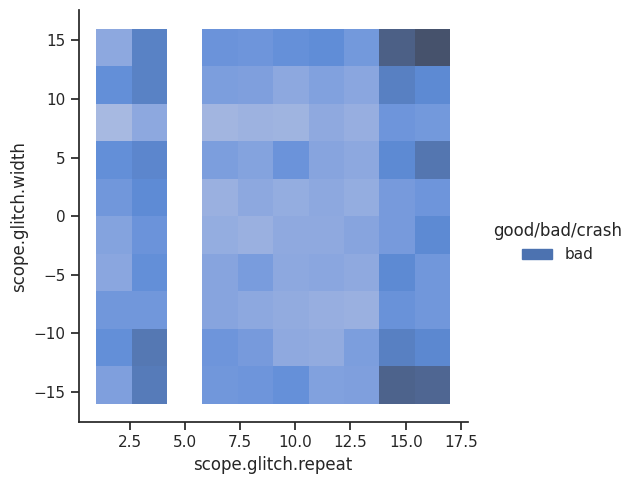

In [44]:
sns.displot(data=df[df["good/bad/crash"] == "bad"], x="scope.glitch.repeat", y="scope.glitch.width", hue='good/bad/crash', bins=10)

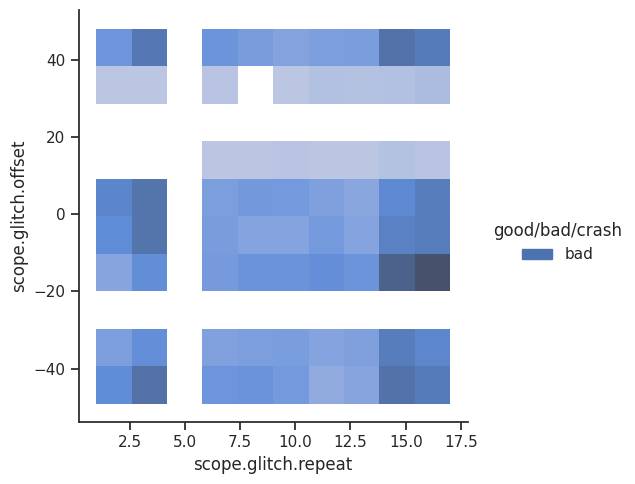

In [48]:
sns.displot(data=df[df["good/bad/crash"] == "bad"], x="scope.glitch.repeat", y="scope.glitch.offset", hue='good/bad/crash', bins=10)

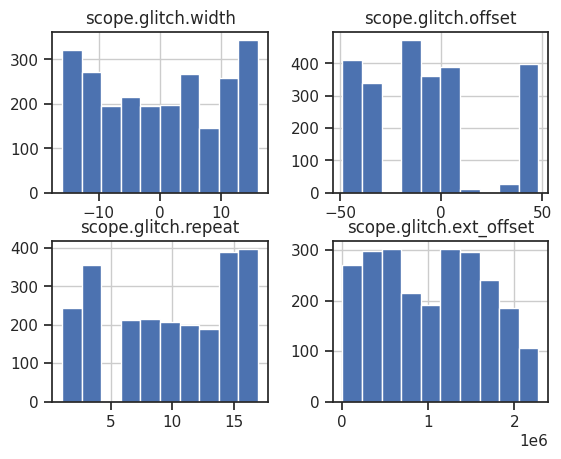

In [32]:
p = df[df["good/bad/crash"] == "bad"].hist(bins=10)

<Axes: xlabel='scope.glitch.width', ylabel='Count'>

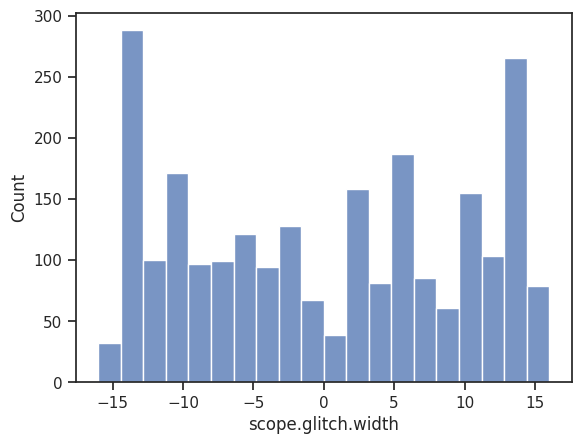

In [34]:
sns.histplot(data=df[df["good/bad/crash"]=="bad"], x="scope.glitch.width", bins=20)

In [35]:
grouped_df = df
grouped_df["scope.glitch.width"] = round(grouped_df["scope.glitch.width"])
grouped_df["scope.glitch.offset"] = round(grouped_df["scope.glitch.offset"])
grouped_df = grouped_df[grouped_df["good/bad/crash"] == "bad"].drop(["scope.glitch.ext_offset"], axis=1).groupby(["scope.glitch.width", "scope.glitch.offset"]).count()

In [36]:
grouped_df

scope.glitch.repeat  good/bad/crash
scope.glitch.width scope.glitch.offset                                     
-16.0              -35.0                                  2               2
-15.0              -49.0                                  3               3
                   -47.0                                  9               9
                   -41.0                                  7               7
                   -39.0                                  1               1
...                                                     ...             ...
 15.0              -4.0                                   8               8
                   -3.0                                  14              14
                   -2.0                                   1               1
                   -1.0                                   1               1
 16.0              -1.0                                   2               2

[330 rows x 2 columns]

In [37]:
top15 = grouped_df.sort_values(["good/bad/crash"], ascending=False).head(15)

In [38]:
list(top15.index)

[(-9.0, 46.0),
 (-9.0, 44.0),
 (3.0, -13.0),
 (9.0, 3.0),
 (14.0, -3.0),
 (-13.0, -46.0),
 (-12.0, -47.0),
 (-13.0, -41.0),
 (-6.0, 42.0),
 (5.0, -13.0),
 (-13.0, -47.0),
 (5.0, 7.0),
 (-7.0, 43.0),
 (-3.0, 40.0),
 (-13.0, -43.0)]